# Topic 8: Consumption

This lecture provides graphs on the section on consumption.

In [1]:
# render graphs within notebook
%matplotlib inline
# import relevant packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


# GDP composition

U.S. GDP shares according to data from Bureau of Economic Analysis.

<a href="http://www.bea.gov/national/">BEA website link</a>

BEA code A019RE1, FRED code A019RE1Q156NBEA, Net exports of goods and services

BEA code DPCERE1, FRED code DPCERE1Q156NBEA, Personal consumption expenditures

BEA code A006RE1, FRED code	A006RE1Q156NBEA, Gross private domestic investment

BEA code A822RE1, FRED code	A822RE1Q156NBEA, Government consumption expenditures and gross investment




Text(1985, 90, 'Government consumption expenditures and gross investment')

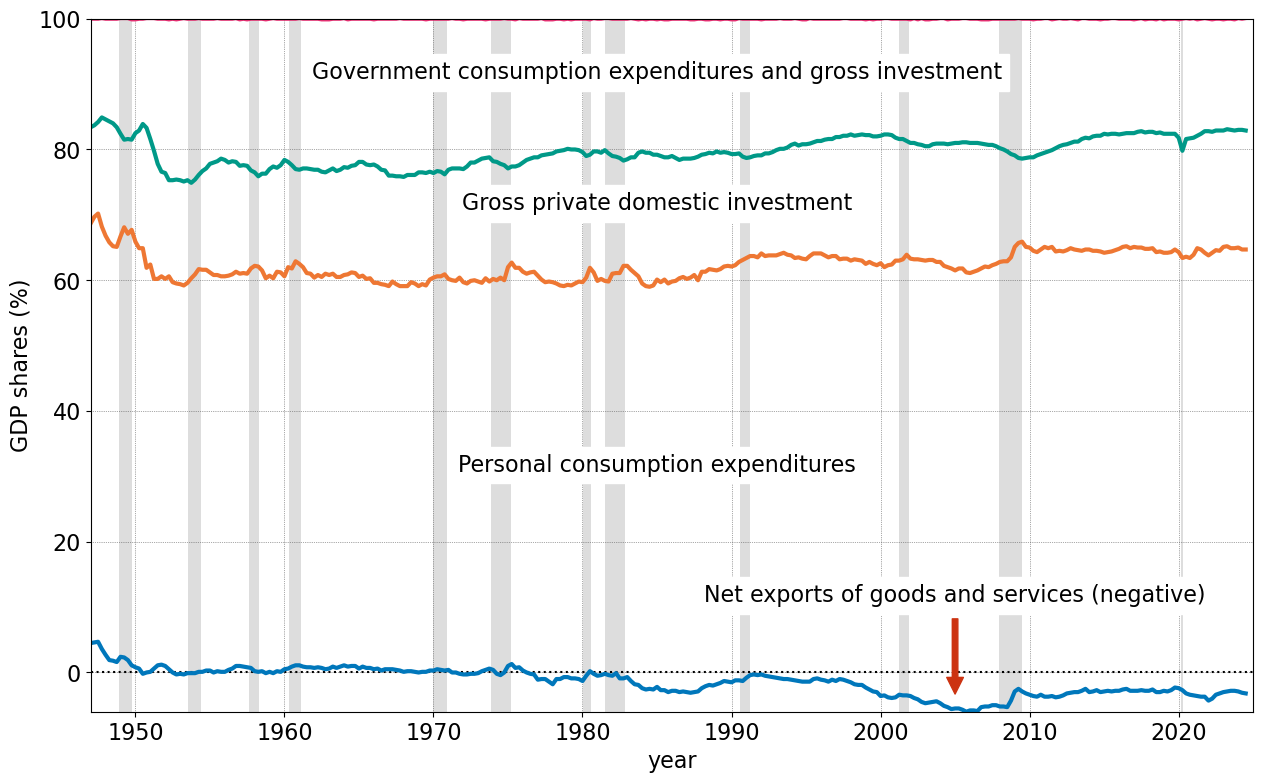

In [2]:
# NIPA data
data = ec.LoadDataFRED(series=['A019RE1Q156NBEA','DPCERE1Q156NBEA','A006RE1Q156NBEA','A822RE1Q156NBEA'],transform='none')

d_net_exports = data['A019RE1Q156NBEA']
d_consumption = data['DPCERE1Q156NBEA']
d_investment = data['A006RE1Q156NBEA']
d_government = data['A822RE1Q156NBEA']

param = {'title': '',
         'xlim': [1947,2025], 'ylim': [-6,100],
         'xlabel': 'year', 'ylabel': 'GDP shares (%)',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': True, 'showNBERrecessions_y': [-10,100]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],d_net_exports,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Net exports of goods and services')
ax.plot(data['year'],d_net_exports+d_consumption,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Personal consumption expenditures')
ax.plot(data['year'],d_net_exports+d_consumption+d_investment,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantTeal'],label='Gross private domestic investment')
ax.plot(data['year'],d_net_exports+d_consumption+d_investment+d_government,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantMagenta'],label='Government consumption expenditures and gross investment')
#ax.plot(data['year'],data['CPILFESL'],
#                    linewidth=3,marker='',color=ec.tolColor['tolVibrantOrange'],label='Consumer Price Index: All Items Less Food and Energy')
#x = ax.legend(loc='upper right')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=ec.tolColor['tolHighContrastWhite'], edgecolor=ec.tolColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=ec.tolColor['tolVibrantRed'],facecolor=ec.tolColor['tolVibrantRed'], shrink=0.05))

ax.annotate('Net exports of goods and services (negative)',
            xy=(2005,-4),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2005,10), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)
ax.annotate('Personal consumption expenditures',
            xy=(1985,30),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)
ax.annotate('Gross private domestic investment',
            xy=(1985,70),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)
ax.annotate('Government consumption expenditures and gross investment',
            xy=(1985,90),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

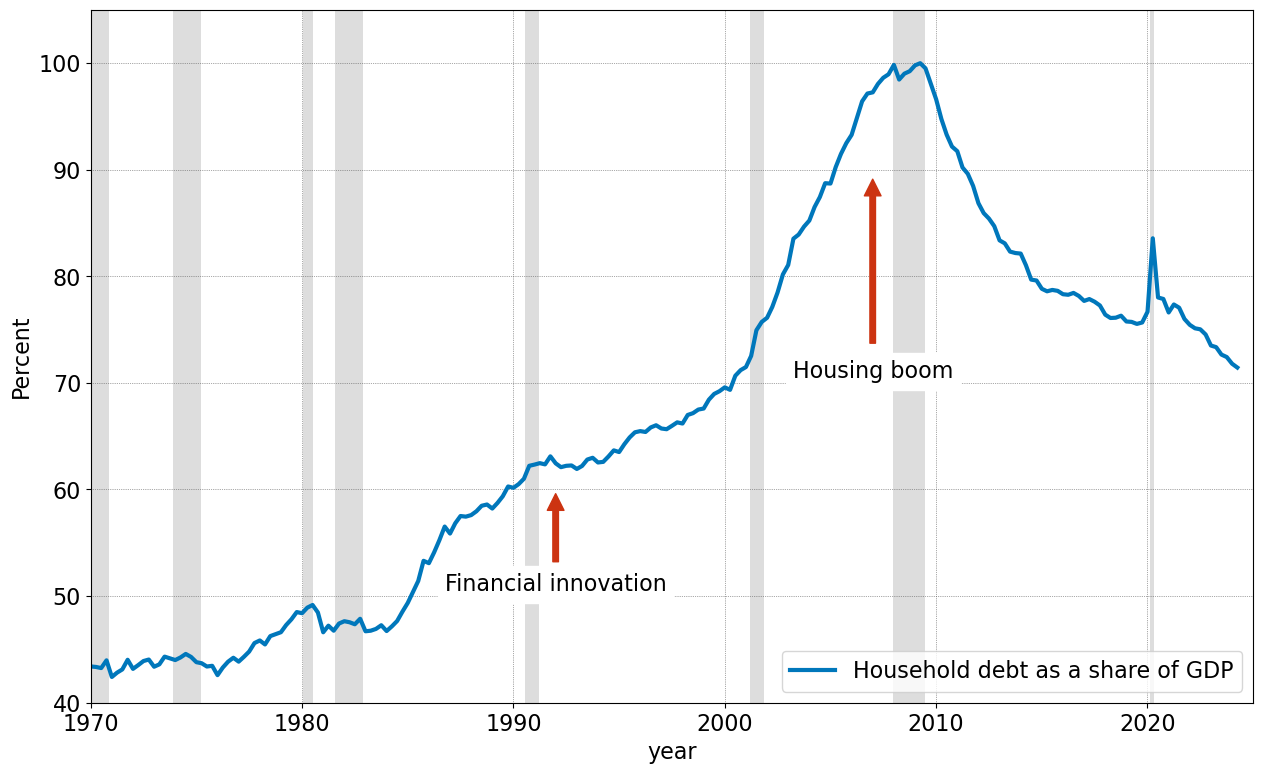

In [3]:
# household debt as a share of GDP
data = ec.LoadDataFRED(series=['GDP','TLBSHNO'],transform='none')

# saving rate graph
param = {'title': '',
         'xlim': [1970,2025], 'ylim': [40,105],
         'xlabel': 'year', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [40,105]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['TLBSHNO']/data['GDP']*100,
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Household debt as a share of GDP')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=ec.tolColor['tolHighContrastWhite'], edgecolor=ec.tolColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=ec.tolColor['tolVibrantRed'],facecolor=ec.tolColor['tolVibrantRed'], shrink=0.05))

ax.annotate("Financial innovation",
            xy=(1992,60),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(1992,50), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.annotate("Housing boom",
            xy=(2007,90),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2007,70), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.legend(loc='lower right')

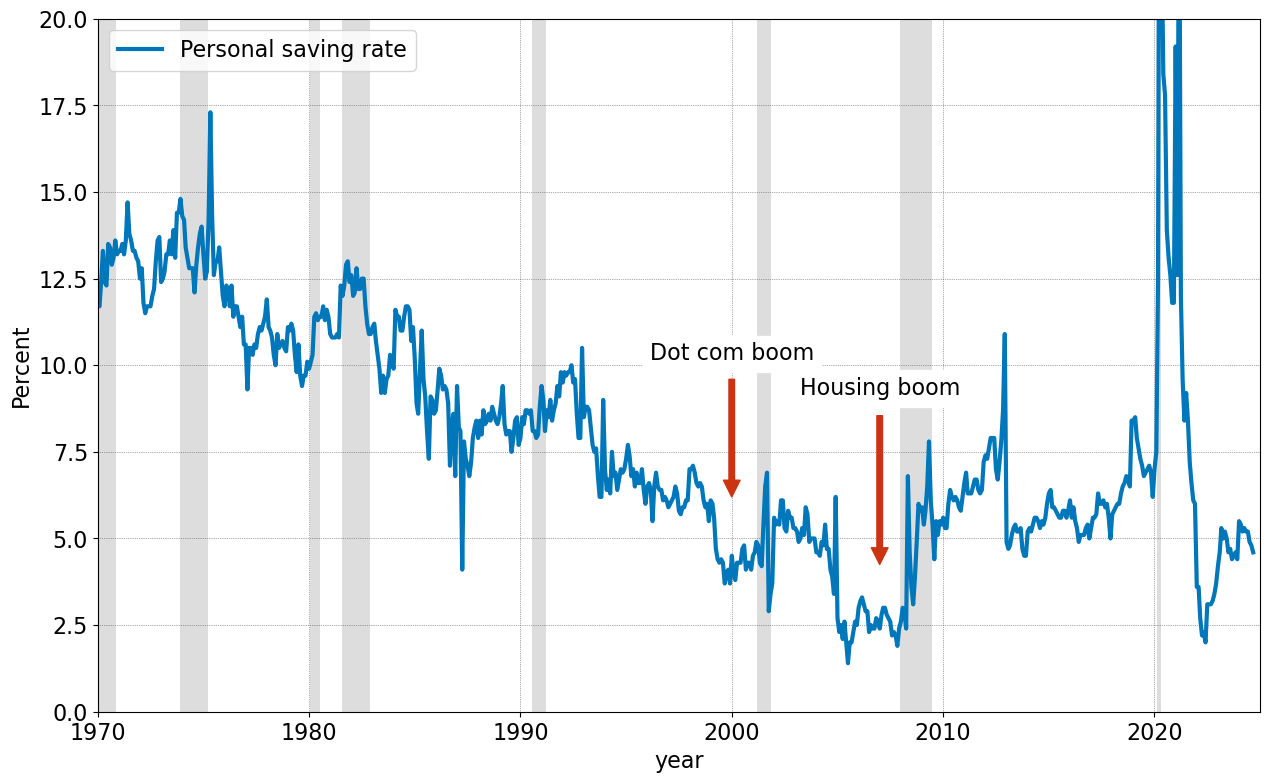

In [4]:
# saving rate and net worth data
data = ec.LoadDataFRED(series=['PSAVERT'],transform='none')

# saving rate graph
param = {'title': '',
         'xlim': [1970,2025], 'ylim': [0,20],
         'xlabel': 'year', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,35]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['PSAVERT'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Personal saving rate')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=ec.tolColor['tolHighContrastWhite'], edgecolor=ec.tolColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=ec.tolColor['tolVibrantRed'],facecolor=ec.tolColor['tolVibrantRed'], shrink=0.05))

ax.annotate("Dot com boom",
            xy=(2000,6),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2000,10), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.annotate("Housing boom",
            xy=(2007,4),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2007,9), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.legend(loc='upper left')

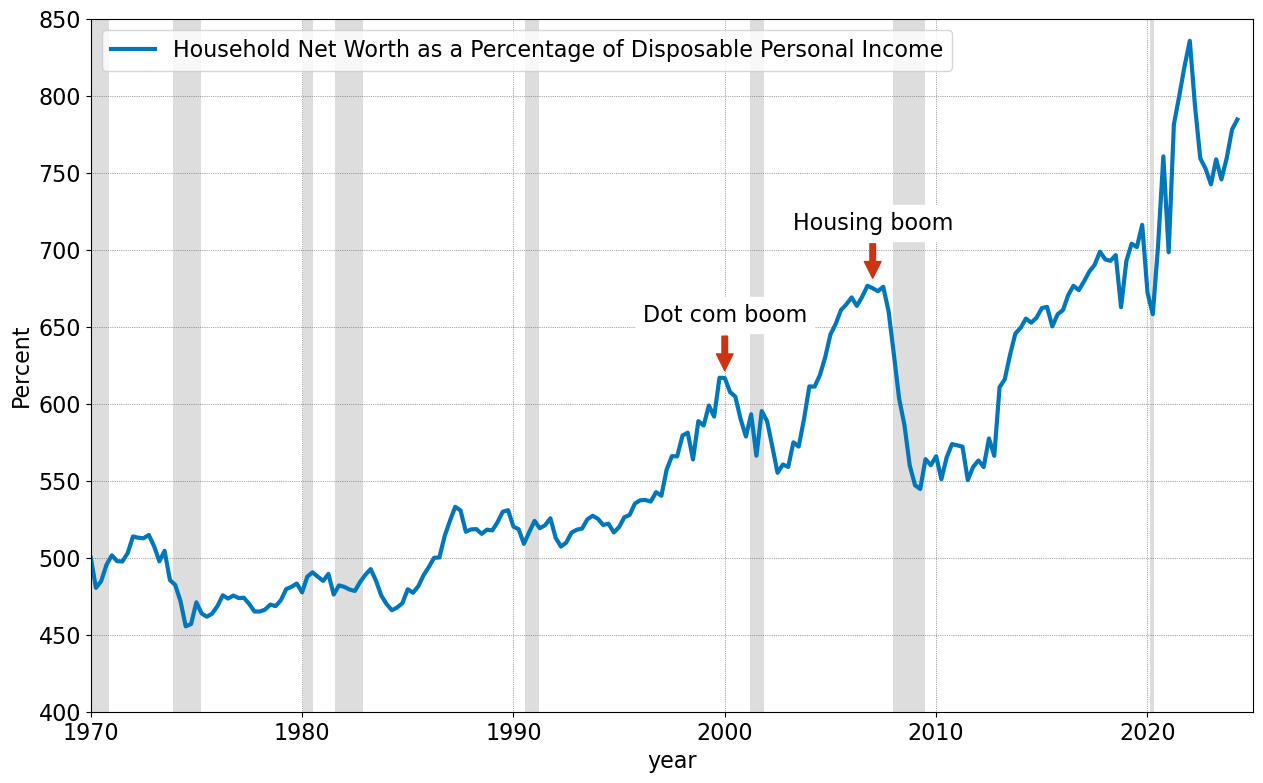

In [5]:
data = ec.LoadDataFRED(series=['HNONWPDPI'],transform='none')

# net worth data
param = {'title': '',
         'xlim': [1970,2025], 'ylim': [400,850],
         'xlabel': 'year', 'ylabel': 'Percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [400,850]}

fig,ax = ec.GenerateTSPlot(param)

ax.plot(data['year'],data['HNONWPDPI'],
                    '-',linewidth=3,marker='',color=ec.tolColor['tolVibrantBlue'],label='Household Net Worth as a Percentage of Disposable Personal Income')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=ec.tolColor['tolHighContrastWhite'], edgecolor=ec.tolColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=ec.tolColor['tolVibrantRed'],facecolor=ec.tolColor['tolVibrantRed'], shrink=0.05))

ax.annotate("Dot com boom",
            xy=(2000,620),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2000,650), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.annotate("Housing boom",
            xy=(2007,680),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2007,710), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',
            **style)

ax.legend(loc='upper left')